<a href="https://colab.research.google.com/github/vina12alvina/HW_MachineLearning_Vina-alvina-herawati/blob/main/HW_MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      0     1
0  12.0  15.0
1  20.5  16.0
2  21.0  18.0
3  15.5  27.0
4  15.3  21.0
(36, 2)
   Sales  Advertising
0   12.0         15.0
1   20.5         16.0
2   21.0         18.0
3   15.5         27.0
4   15.3         21.0
RMSE: 12.8197563902471
R2 Score: 0.5875233784338036
Predicted advertising cost for 50 sales: $70.65 million
Predicted advertising cost for 100 sales: $153.75 million
Predicted advertising cost for 150 sales: $236.85 million


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


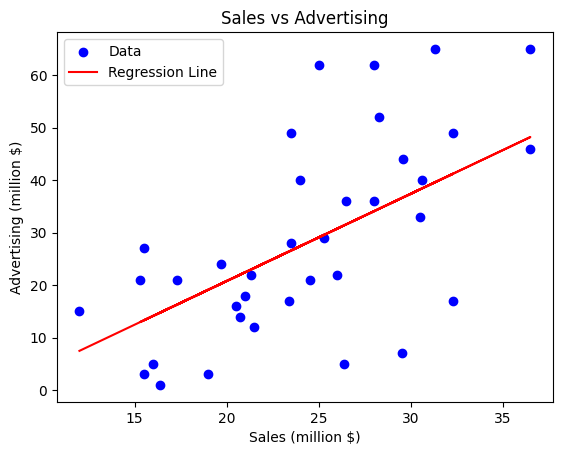

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
url = "https://www.econometrics.com/intro/SALES.txt"
data = pd.read_csv(url, delimiter="\s+", header=None)

# Display the first few rows of the data to check column names and structure
print(data.head())

# Check the shape of the DataFrame to ensure it has the correct number of columns
print(data.shape)

# Rename the columns if there are two columns
if data.shape[1] == 2:
    data.columns = ['Sales', 'Advertising']
else:
    print("The data does not have the expected number of columns.")

# Display the first few rows of the data after renaming columns
print(data.head())

# Proceed only if the columns are correctly named
if 'Sales' in data.columns and 'Advertising' in data.columns:
    # Prepare the data for regression
    X = data[['Sales']]  # Feature
    y = data['Advertising']  # Target

    # Split the data into training and test sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"RMSE: {rmse}")
    print(f"R2 Score: {r2}")

    # Make predictions for 50, 100, and 150 sales
    sales_values = np.array([[50], [100], [150]])
    predicted_ad_costs = model.predict(sales_values)

    for sales, cost in zip(sales_values, predicted_ad_costs):
        print(f"Predicted advertising cost for {sales[0]} sales: ${cost:.2f} million")

    # Plot the results
    plt.scatter(X, y, color='blue', label='Data')
    plt.plot(X, model.predict(X), color='red', label='Regression Line')
    plt.xlabel('Sales (million $)')
    plt.ylabel('Advertising (million $)')
    plt.title('Sales vs Advertising')
    plt.legend()
    plt.show()
else:
    print("Cannot proceed as the data structure is not as expected.")
